In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "D:\\Documents\\MCA 4TH SEM\\MCA-206 DA\\FULL SEMESTER PROJECT\\Airbnb_data_clean.csv"

In [3]:
df = pd.read_csv(file_path, encoding='latin1')

C:\Users\bsumi\AppData\Local\Temp\ipykernel_5820\3212388808.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [4]:
X = df[['log_price', 'number_of_reviews']]

In [5]:
min_log_price = X['log_price'].min()
max_log_price = X['log_price'].max()
X['log_price_normalized'] = (X['log_price'] - min_log_price) / (max_log_price - min_log_price) * 99 + 1

C:\Users\bsumi\AppData\Local\Temp\ipykernel_5820\2254005908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_price_normalized'] = (X['log_price'] - min_log_price) / (max_log_price - min_log_price) * 99 + 1


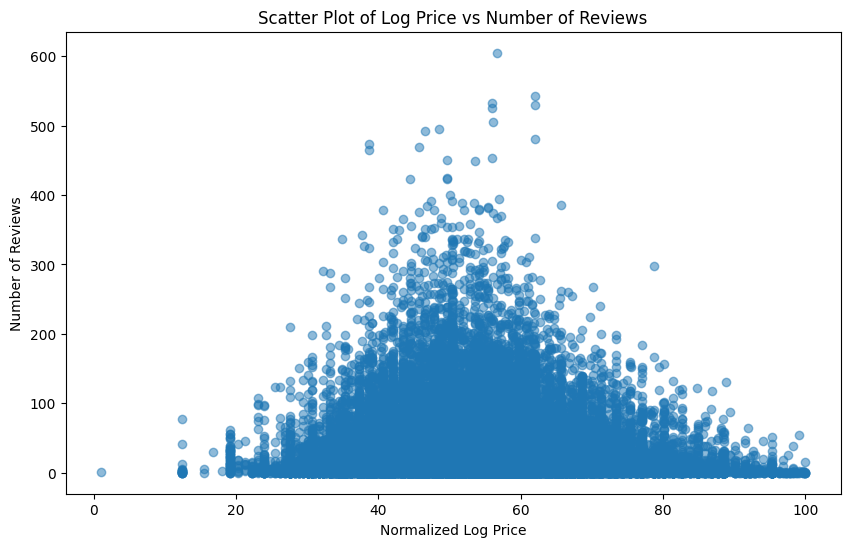

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X['log_price_normalized'], X['number_of_reviews'], alpha=0.5)
plt.xlabel('Normalized Log Price')
plt.ylabel('Number of Reviews')
plt.title('Scatter Plot of Log Price vs Number of Reviews')
plt.show()

In [7]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[['log_price_normalized', 'number_of_reviews']])
    sse.append(kmeans.inertia_)

C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

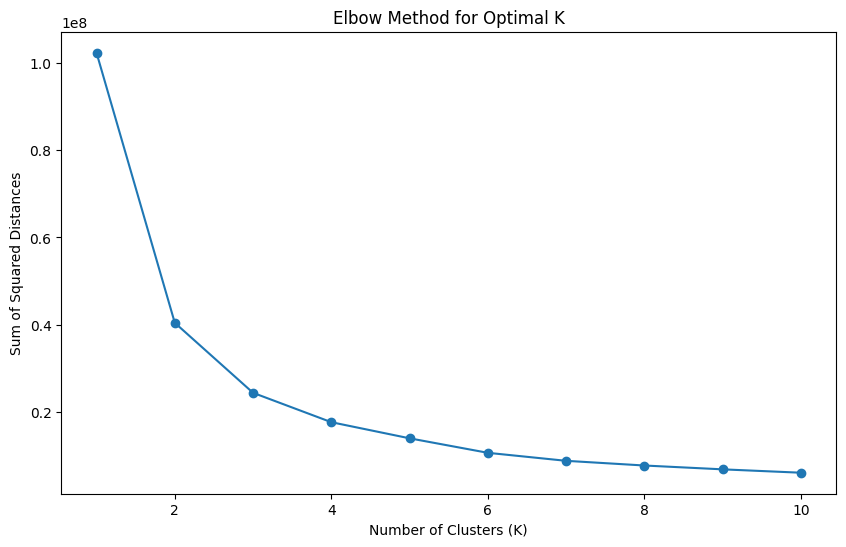

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()


In [9]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X[['log_price_normalized', 'number_of_reviews']])

C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

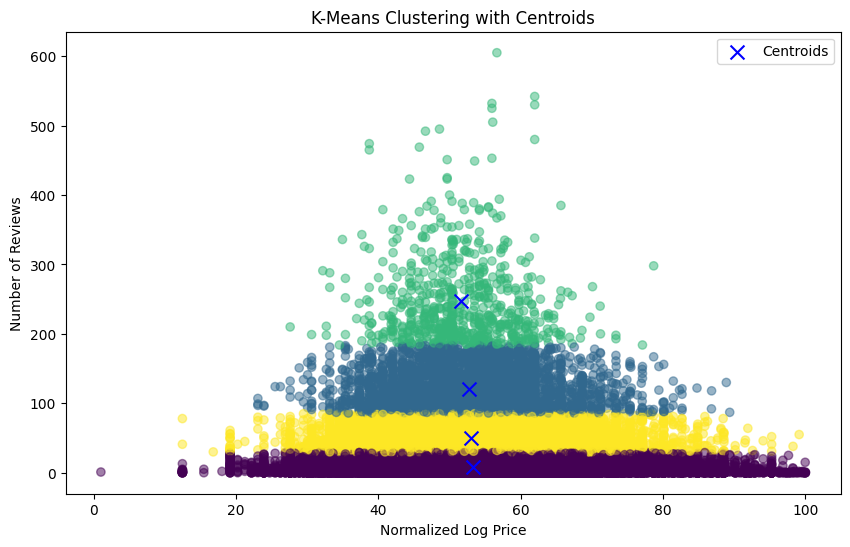

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X['log_price_normalized'], X['number_of_reviews'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='blue', label='Centroids')
plt.xlabel('Normalized Log Price')
plt.ylabel('Number of Reviews')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()